<a href="https://colab.research.google.com/github/DevuP1506/Cognorise-Internship-Tasks/blob/main/SMS_Spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SPAM SMS DETECTION.**

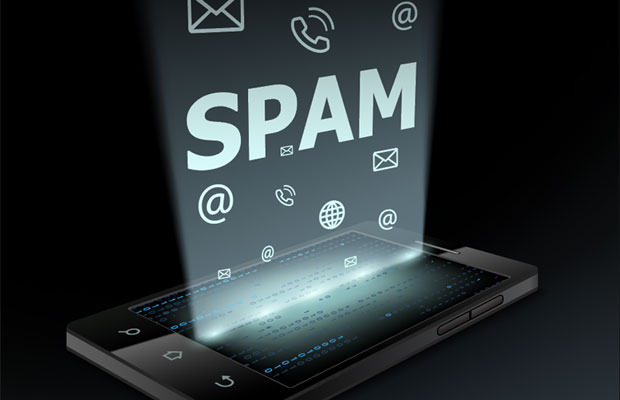

## **CONTENT OVERVIEW.**

# 1.Introduction.
# 2.Data Inspection.
# 3.Data Visualization.
# 4.Data Preprocessing.
# 5.Predictive Analytics.
# 6.Conclusion.



## **1.Introduction.**

Short Message Service (SMS) spam has become a prevalent issue, with unsolicited messages often leading to privacy invasion, financial scams, and user annoyance. Effective detection of spam messages is crucial to ensure a seamless user experience and protect users from potential threats.

In this project, the aim is to develop a machine learning model for SMS spam detection. Our goal is to create a system that can accurately classify SMS messages as either spam or non-spam (ham). We will explore various machine learning algorithms and natural language processing techniques to achieve this objective.

By building an efficient SMS spam detection system, we can enhance user safety and improve the overall SMS experience. This project will contribute to the advancement of spam detection techniques and help mitigate the impact of SMS spam on users.

The dataset has been sourced from kaggle.It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains raw text.

Importing Necessary Libraries.

In [44]:
import numpy as np
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import re
import plotly.express as px
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score
from sklearn.metrics import classification_report

Importing data.

In [45]:
df=pd.read_csv('/content/spam.csv',encoding='ISO-8859-1')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## **2.Data Inspection.**

In [46]:
#Dropping the unwanted columns
#df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
#df

In [47]:
#Get the column names.
#df.columns=['Label','Message_body']
#df

In [48]:
#Get the first 5 rows.
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [49]:
#Get the last five rows.
df.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [50]:
#Get the shape of dataset.
df.shape

(5572, 2)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [52]:
#Check for the null values.
df.isna().sum()

Category    0
Message     0
dtype: int64

In [53]:
#Check for the unique values.
df['Category'].unique()

array(['ham', 'spam'], dtype=object)

## **3.Data Visualization.**

In [54]:
#Get the label count.
label_count=df['Category'].value_counts()
label_count

Category
ham     4825
spam     747
Name: count, dtype: int64

In [55]:
#PieChart
pie_chart = px.pie(label_count,
                  values=label_count.values,
                  names=label_count.index,
                  color=label_count.index,
                  title='Distribution spam and ham',
                  labels={'values': 'Frequency', 'names': 'Category'},
                       hole=.4,)
# Adding text labels
pie_chart.update_traces(textinfo='label+percent', pull=[0.1, 0.1, 0.1, 0.1, 0.1])

# Customizing layout
pie_chart.update_layout(font=dict(size=14, color="black"), height=500,template='plotly')
# Show the pie chart
pie_chart.show()

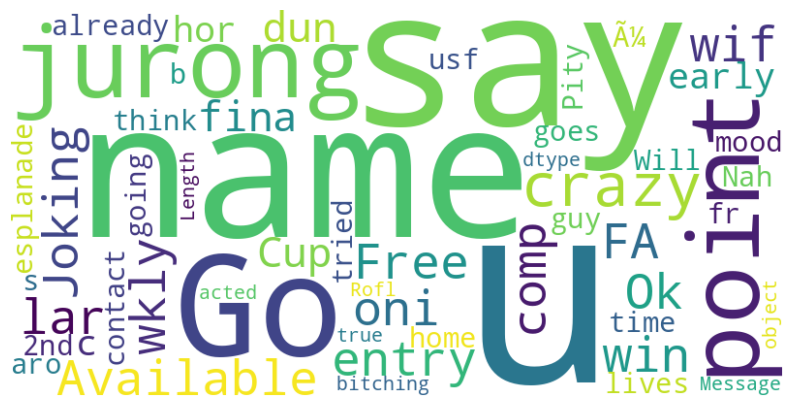

In [56]:
#Message
words=df['Message']

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(str(words))

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## **4.Data Preprocessing.**

In [57]:
#Replace spam with 0 and no spam with 1
df['Category']=df['Category'].map({'spam':0,'ham':1})
df

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will Ã¼ b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [58]:
#Downloading all the package
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [59]:
#Assigning meassage body to a variable
sms=df.Message
sms

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ã¼ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [60]:
#Tokenization
from nltk import TweetTokenizer
tk=TweetTokenizer()
sms=sms.apply(lambda x:tk.tokenize(x)).apply(lambda x:' '.join(x))#To join the tokens together with a space
sms

0       Go until jurong point , crazy .. Available onl...
1                         Ok lar ... Joking wif u oni ...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor ... U c already then sa...
4       Nah I don't think he goes to usf , he lives ar...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568              Will Ã ¼ b going to esplanade fr home ?
5569    Pity , * was in mood for that . So ... any oth...
5570    The guy did some bitching but I acted like i'd...
5571                          Rofl . Its true to its name
Name: Message, Length: 5572, dtype: object

In [61]:
#Removing special characters
sms=sms.str.replace('[^a-zA-Z0-9]+',' ')
sms

0       Go until jurong point , crazy .. Available onl...
1                         Ok lar ... Joking wif u oni ...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor ... U c already then sa...
4       Nah I don't think he goes to usf , he lives ar...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568              Will Ã ¼ b going to esplanade fr home ?
5569    Pity , * was in mood for that . So ... any oth...
5570    The guy did some bitching but I acted like i'd...
5571                          Rofl . Its true to its name
Name: Message, Length: 5572, dtype: object

In [62]:
#Removing words having length less than 3 and also correcting index
from nltk.tokenize import word_tokenize
sms=sms.apply(lambda x:' '.join([w for w in word_tokenize(x) if len(w)>3]))
sms

0       until jurong point crazy Available only bugis ...
1                                                  Joking
2       Free entry wkly comp final tkts 21st 2005 Text...
3                                      early already then
4                     think goes lives around here though
                              ...                        
5567    This time have tried contact have Pound prize ...
5568                            Will going esplanade home
5569                     Pity mood that other suggestions
5570    some bitching acted like interested buying som...
5571                                       Rofl true name
Name: Message, Length: 5572, dtype: object

In [63]:
#Stemming
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
sms=sms.apply(lambda x:[stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
sms

0       until jurong point crazi avail onli bugi great...
1                                                    joke
2       free entri wkli comp final tkts 21st 2005 text...
3                                      earli alreadi then
4                       think goe live around here though
                              ...                        
5567    this time have tri contact have pound prize cl...
5568                                will go esplanad home
5569                         piti mood that other suggest
5570    some bitch act like interest buy someth els ne...
5571                                       rofl true name
Name: Message, Length: 5572, dtype: object

In [64]:
#Removing stopwords
from nltk.corpus import stopwords
sw=stopwords.words('english')
sms=sms.apply(lambda x:[i for i in tk.tokenize(x) if i not in sw]).apply(lambda x:' '.join(x))
sms

0       jurong point crazi avail onli bugi great world...
1                                                    joke
2       free entri wkli comp final tkts 21st 2005 text...
3                                           earli alreadi
4                            think goe live around though
                              ...                        
5567    time tri contact pound prize claim easi call 0...
5568                                     go esplanad home
5569                                    piti mood suggest
5570    bitch act like interest buy someth els next we...
5571                                       rofl true name
Name: Message, Length: 5572, dtype: object

In [65]:
#Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
train_data=vec.fit_transform(sms)

In [66]:
train_data.shape

(5572, 6386)

In [67]:
print(train_data)

  (0, 891)	0.3791568510778277
  (0, 1604)	0.32031323995860306
  (0, 1385)	0.3619461981219453
  (0, 6274)	0.254175153745963
  (0, 2765)	0.20905880971632906
  (0, 1387)	0.32031323995860306
  (0, 4118)	0.18161162497755637
  (0, 1065)	0.28589193404683816
  (0, 1800)	0.2936308811907682
  (0, 4395)	0.25889631413041964
  (0, 3261)	0.3791568510778277
  (1, 3235)	1.0
  (2, 76)	0.29814326023059234
  (2, 958)	0.21224521382178713
  (2, 4643)	0.21224521382178713
  (2, 4602)	0.20936981628938622
  (2, 4678)	0.2050477408574603
  (2, 684)	0.2802825999094917
  (2, 5620)	0.14959759833792097
  (2, 382)	0.28808465796500726
  (2, 390)	0.28808465796500726
  (2, 5727)	0.2802825999094917
  (2, 2443)	0.2132587427552451
  (2, 1690)	0.2468738111593467
  (2, 6245)	0.24187039034210936
  :	:
  (5567, 4439)	0.2944390118719413
  (5567, 1431)	0.15237647522673445
  (5567, 1609)	0.23257986724306218
  (5567, 4513)	0.24384669666628192
  (5567, 4118)	0.20129468475687537
  (5568, 2280)	0.782681381846728
  (5568, 2695)	0.4395

In [68]:
y=df['Category'].values
y

array([1, 1, 0, ..., 1, 1, 1])

In [69]:
#Splitting x and y.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_data,y,test_size=0.30,random_state=42)
x_train

<3900x6386 sparse matrix of type '<class 'numpy.float64'>'
	with 25755 stored elements in Compressed Sparse Row format>

In [70]:
x_test

<1672x6386 sparse matrix of type '<class 'numpy.float64'>'
	with 10801 stored elements in Compressed Sparse Row format>

In [71]:
y_train

array([1, 1, 1, ..., 1, 1, 1])

In [72]:
y_test

array([1, 1, 1, ..., 1, 0, 1])

## **5.Predictive Analytics.**

In [73]:
#Model selection
l_model=LogisticRegression()
k_model=KNeighborsClassifier(n_neighbors=7)
n_model=MultinomialNB()
s_model=SVC()
d_model=DecisionTreeClassifier(criterion='entropy')
r_model=RandomForestClassifier(criterion='entropy')
lst_model=[l_model,k_model,n_model,s_model,d_model,r_model]

Model name is LogisticRegression()
*****************
[[ 141   83]
 [   3 1445]]
Acuracy score is LogisticRegression()
0.9485645933014354
Model name is KNeighborsClassifier(n_neighbors=7)
*****************
[[  44  180]
 [   0 1448]]
Acuracy score is KNeighborsClassifier(n_neighbors=7)
0.8923444976076556
Model name is MultinomialNB()
*****************
[[ 161   63]
 [   1 1447]]
Acuracy score is MultinomialNB()
0.9617224880382775
Model name is SVC()
*****************
[[ 173   51]
 [   1 1447]]
Acuracy score is SVC()
0.9688995215311005
Model name is DecisionTreeClassifier(criterion='entropy')
*****************
[[ 187   37]
 [  29 1419]]
Acuracy score is DecisionTreeClassifier(criterion='entropy')
0.9605263157894737
Model name is RandomForestClassifier(criterion='entropy')
*****************
[[ 186   38]
 [   1 1447]]
Acuracy score is RandomForestClassifier(criterion='entropy')
0.9766746411483254


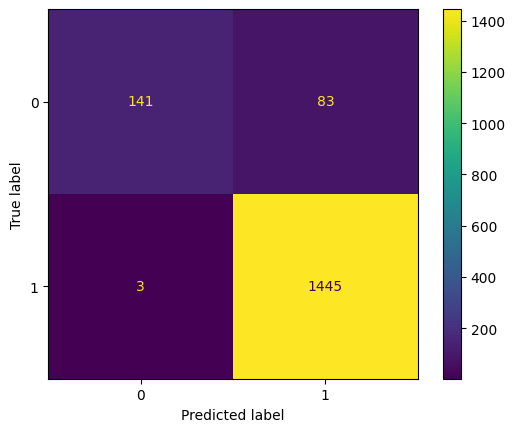

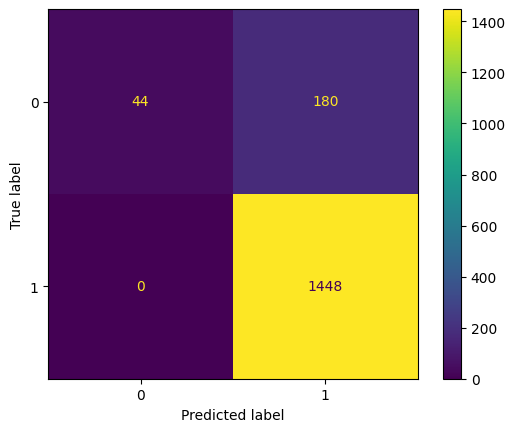

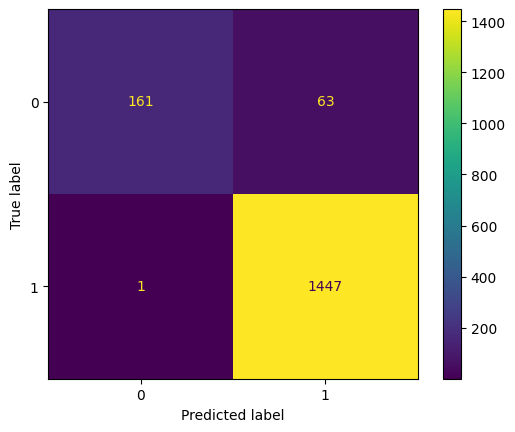

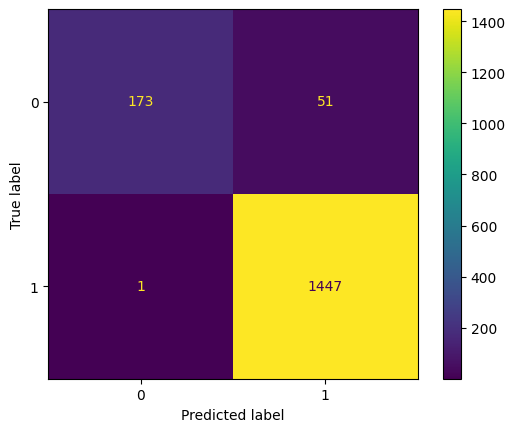

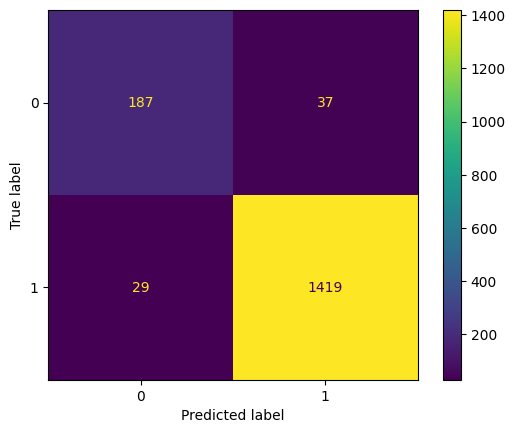

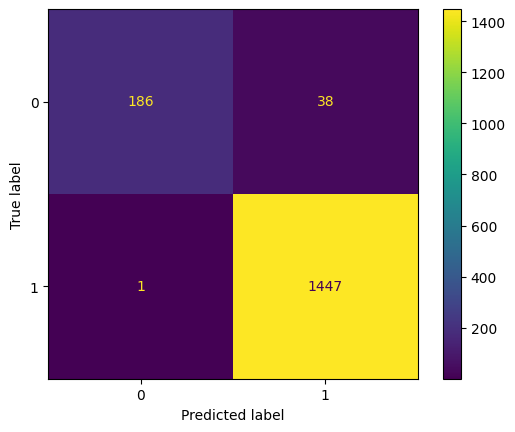

In [74]:
for i in lst_model:
  print("Model name is",i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print("*****************")
  matrix=confusion_matrix(y_test,y_pred)
  print(matrix)
  label=[0, 1]
  dis=ConfusionMatrixDisplay(matrix,display_labels=label)
  dis.plot()
  print("Acuracy score is",i)
  print(accuracy_score(y_test,y_pred))

In [75]:
r_model.fit(x_train,y_train)
y_pred1=r_model.predict(x_test)
y_pred1

array([1, 1, 1, ..., 1, 0, 1])

In [76]:
#Model Evaluation.
print(classification_report(y_pred1, y_test))

              precision    recall  f1-score   support

           0       0.83      0.99      0.91       188
           1       1.00      0.98      0.99      1484

    accuracy                           0.98      1672
   macro avg       0.92      0.98      0.95      1672
weighted avg       0.98      0.98      0.98      1672



## **6.Conclusion.**

   Among the five models created, Random Forest Clssifier outshines the other model with Accuracy of 97%.